### Linear Regression for BoomBikes by Shailesh Kadre - Jan 11 2023 ML C-46 Batch

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:
- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

#### The analysis contains the following main elements:

- Data Exploration & Data cleansing, including missing values and outliers.  
- Univariate Analysis
- Segmented Univariate Analysis
- Further exploration of some important findings
- Bivariate Analysis
- Heat Maps
- Exploring Heat Maps
- Training the model
- The model Approach
- Analyst's Final Recommendations


In [1]:
#Import the essential Python Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [2]:
# Read the data
df_bike=pd.read_csv(r"day.csv")

In [3]:
# inspect the initial rows of the data
df_bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# check the shape
df_bike.shape # obeservation: there are not many rows in the data set

(730, 16)

In [5]:
# check the important field information
df_bike.info() # obeservation: Data shows that there are no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
#  null values sanity check
df_bike.isnull().sum() # Observation : There are no null values

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
# drop duplicate rows, if any
 
df_bike=df_bike.drop_duplicates()
df_bike.shape # The shape is equal to original so no duplicate

(730, 16)

In [8]:
df_bike.dtypes # check the data types of the original dataset

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [9]:
# to check the colums pesent in the original data set
print(df_bike.columns)

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')


In [10]:
# Have the basic idea of data set using describe
df_bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [11]:
# checking for type of data_types of  columns
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 97.0+ KB


In [12]:
# Eliminate the columns which does not add any value to the current business study
# let us again view the data
df_bike.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [13]:
#column instant is just an index and does not add any additional info, so dropping it
df_bike.drop(['instant'],axis=1,inplace=True)
# column 'dteday' is redundant as this info is repeated in columns yr and month
df_bike.drop(['dteday'],axis=1,inplace=True)

In [24]:
df_bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [14]:
# by observation, we find that column cnt is sum of casual and registered so dopping both the columns.
df_bike.drop(['casual','registered'],axis=1,inplace=True)
df_bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [15]:
# Now check for data types of different columns in the data set
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 74.1 KB


from the study of the dictionary although  season,yr,mnth,holiday,weekday,workingday,weathersit all have numeric values but they are categorical variables and need to convert accordingly

In [16]:
# Replacing season with appropriate categorical variable
df_bike['season'].replace({1:"spring",2:"summer",3:"fall",4:"winter"},inplace=True)


In [17]:
df_bike['season'].head()

0    spring
1    spring
2    spring
3    spring
4    spring
Name: season, dtype: object

In [18]:
# Replacing 'weathersit' with appropriate categorical variable as per data dictionary
df_bike['weathersit'].replace({1:"Clear_Few Clouds",2:"Mist_cloudy",3:"Light rain_Light snow_Thunderstorm",4:'Heavy Rain_Ice Pallets_Thunderstorm_Mist'},inplace=True)

In [19]:
df_bike['weathersit'].head(10)

0         Mist_cloudy
1         Mist_cloudy
2    Clear_Few Clouds
3    Clear_Few Clouds
4    Clear_Few Clouds
5    Clear_Few Clouds
6         Mist_cloudy
7         Mist_cloudy
8    Clear_Few Clouds
9    Clear_Few Clouds
Name: weathersit, dtype: object

In [20]:
#Replacing 'weekday' with appropriate categorical variable as per data dictionary
df_bike['weekday'].replace({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"},inplace=True)

In [21]:
#Now check the changed  data set
df_bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,Saturday,0,Mist_cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,Sunday,0,Mist_cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,Monday,1,Clear_Few Clouds,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,Tuesday,1,Clear_Few Clouds,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,Wednesday,1,Clear_Few Clouds,9.305237,11.46350,43.6957,12.522300,1600


In [22]:
# check for data types
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 74.1+ KB


In [23]:
# seperate numeric variables
df_bike_numeric =['temp','atemp','hum','windspeed','cnt']
df_bike_numeric

['temp', 'atemp', 'hum', 'windspeed', 'cnt']

In [24]:
# seperate categorical variables 
df_bike_cat = ['season', 'yr', 'mnth','workingday', 'weathersit', 'weekday', 'holiday']
df_bike_cat

['season', 'yr', 'mnth', 'workingday', 'weathersit', 'weekday', 'holiday']

In [25]:
# check for missing total number of columns
len(df_bike_numeric) + len(df_bike_cat)


12

In [26]:
# function to plot histograms  

def plotDistribution(df_bike_numeric):

    plt.figure(figsize=(18, 16))
    for var in df_bike_numeric:
        plt.subplot(4,4,df_bike_numeric.index(var)+1)
        ax = sns.distplot(df_bike[[var]], hist=True, rug=True)
        plt.title(var)
    plt.tight_layout()
    plt.show()

#### Univariate analysis

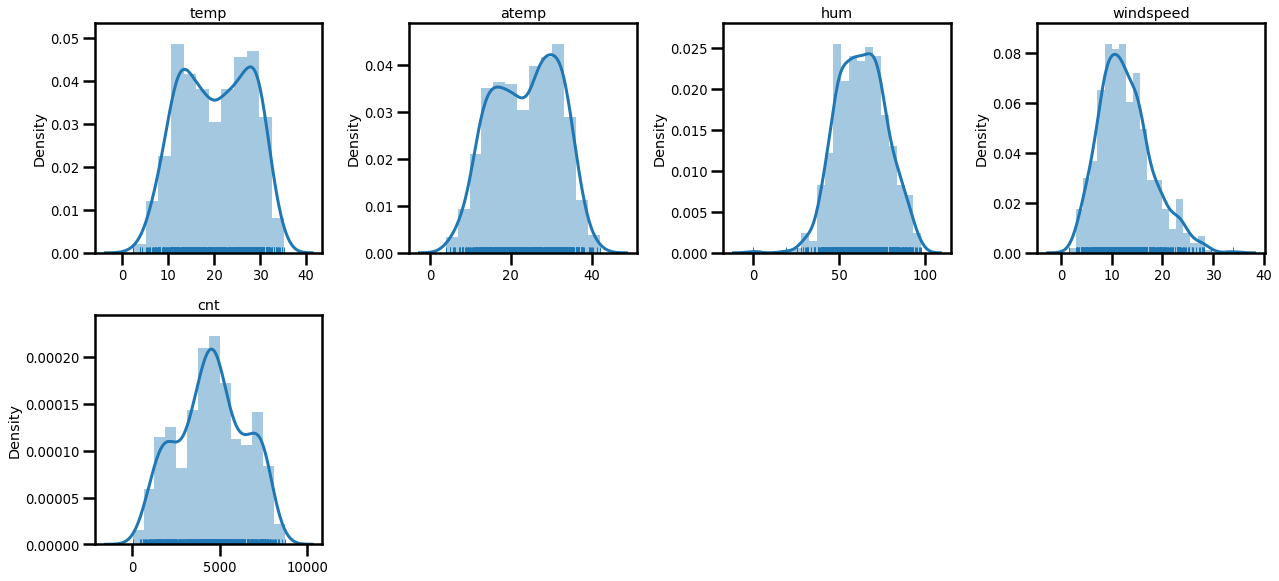

In [27]:
sns.set_context('poster',font_scale=0.6)
plotDistribution(df_bike_numeric) # plot histogram as a part of univariate analysis

- We see the features hum and windspeed have a right skewed distribution
- Some other like temp and a temp are concentrated around two main values
- count variable is con

In [28]:
# univariate analysis- function for box plots for numeric variables

def doBoxPlots(df_bike_numeric):

    plt.figure(figsize=(18, 16))
    for var in df_bike_numeric:
        plt.subplot(4,4,df_bike_numeric.index(var)+1)
        #sns.distplot(df_car[[var]], hist=True, rug=True)
        sns.boxplot(data = df_bike[[var]])
    plt.tight_layout()
    plt.show()

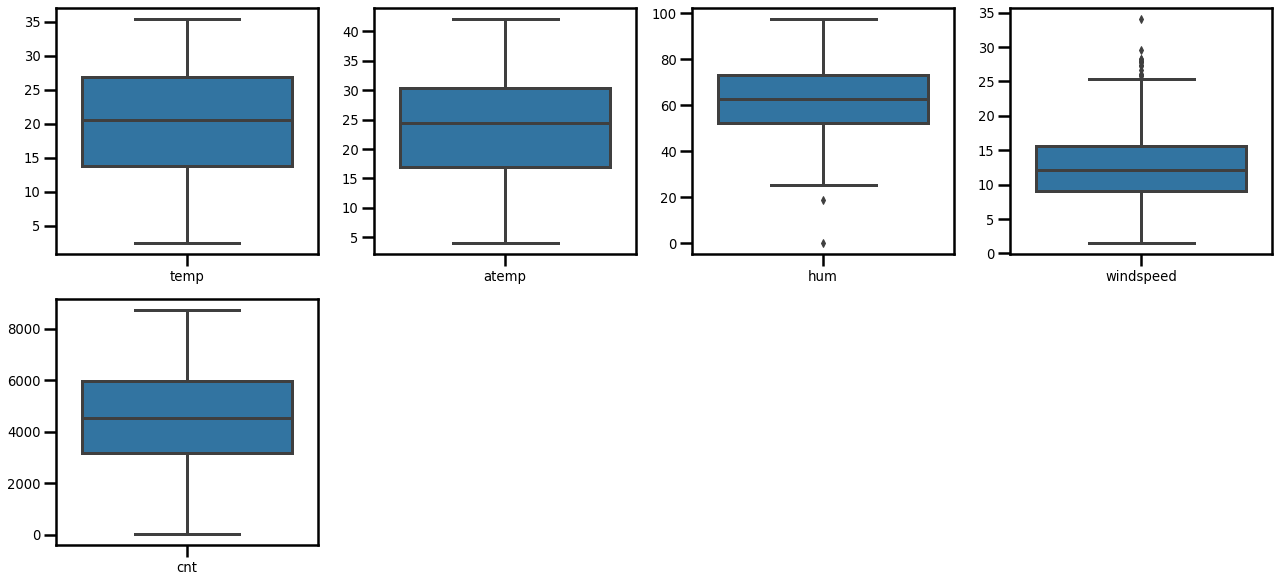

In [29]:
doBoxPlots(df_bike_numeric) # do the box plots

- There are some outliers present in windspeed and humidity variables

In [30]:
#Function to plot categorical variables against cnt
def plotCatVsCnt(catVars):

    plt.figure(figsize=(25, 25))
    for var in catVars:
        plt.subplot(4,2,catVars.index(var)+1)
        sns.boxplot(x = var, y = 'cnt', data = df_bike)
    plt.show()

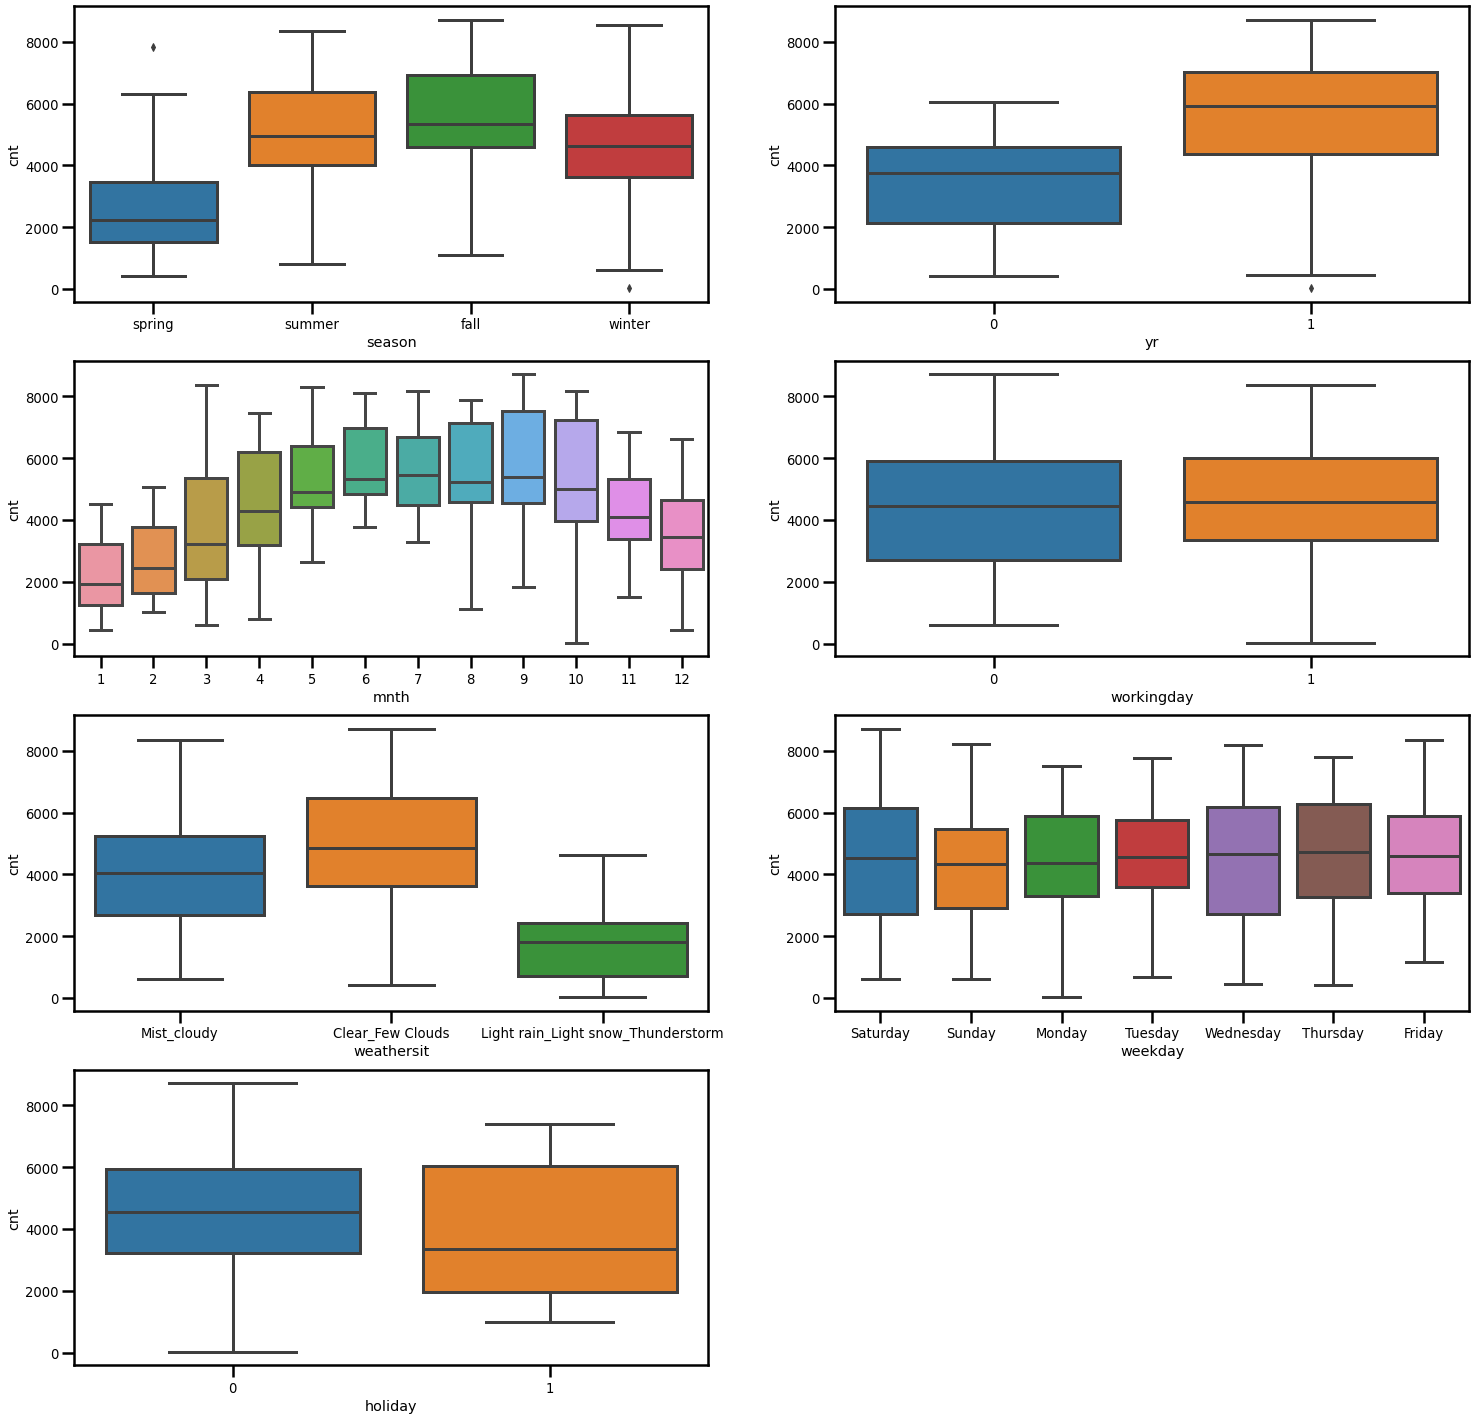

In [31]:
# plot cat vars against cnt
plotCatVsCnt(df_bike_cat)

- Summer and winter seaon has highest effect on bike counts
- year 2019 had more counts as compared to year 2018
- April to Sept has maximum number of bike counts due to weather conditions
- working day really not much affect the bike counts
- For rainy days, the bike counts are minumum
- Working day has more bike counts than holidays

#### Bivariate analysis

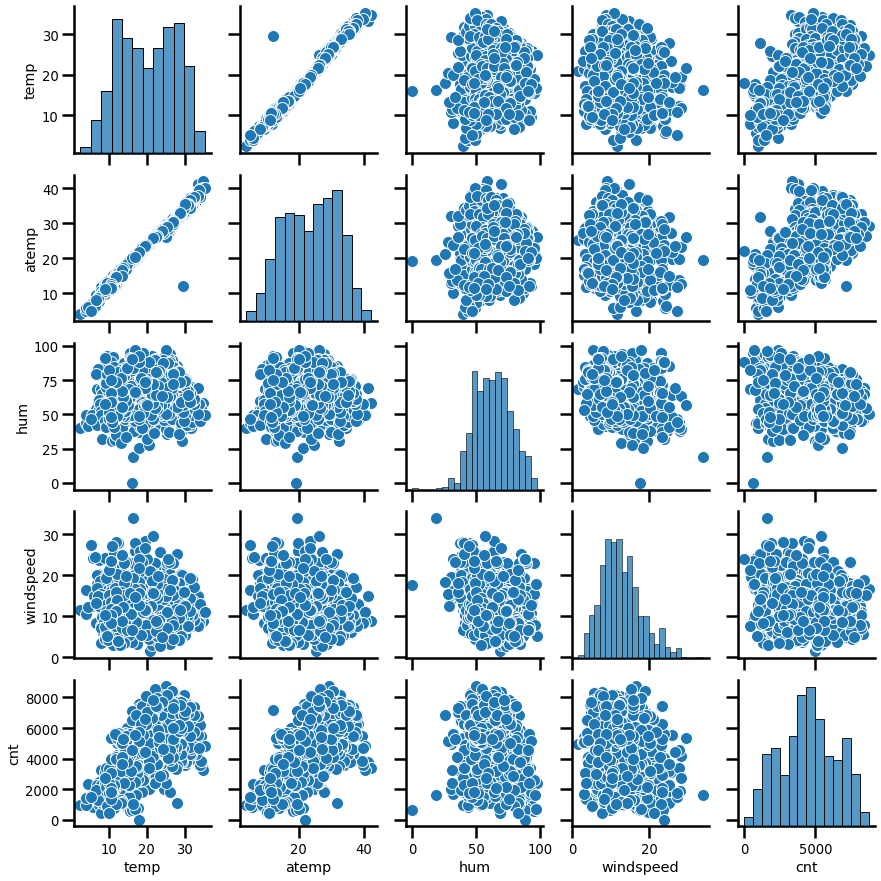

In [32]:
# plot the pairplots for numeric variable to explore the possible correlation manually
sns.pairplot(df_bike, vars=['temp','atemp','hum','windspeed',"cnt"])
plt.show()

- From the above grath it can be seen that var atemp and temp have lenear relationship

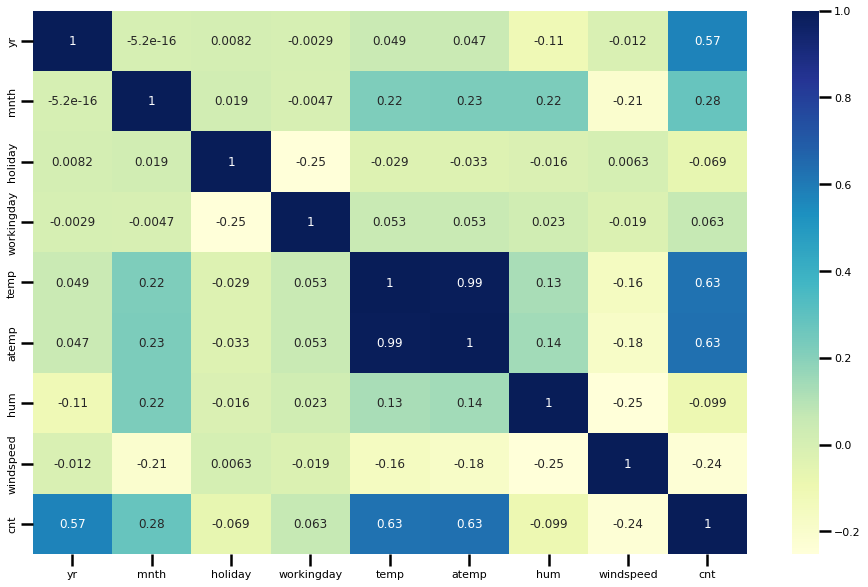

In [33]:
# examine the heat map
sns.set_context('poster',font_scale=0.5)
plt.figure(figsize = (16, 10))
cor=df_bike.corr()
sns.heatmap(cor, annot = True, cmap="YlGnBu")
plt.show()

Following conclusions can be drawn from above heat maps
- The correlation between atemp and temp is 0.99 so one of the variables can be dropped

In [34]:
# So Temp variable is dropped
df_bike.drop(['temp'],axis=1,inplace=True)
df_bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,spring,0,1,0,Saturday,0,Mist_cloudy,18.18125,80.5833,10.749882,985
1,spring,0,1,0,Sunday,0,Mist_cloudy,17.68695,69.6087,16.652113,801
2,spring,0,1,0,Monday,1,Clear_Few Clouds,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,Tuesday,1,Clear_Few Clouds,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,Wednesday,1,Clear_Few Clouds,11.46350,43.6957,12.522300,1600


In [35]:
# confirming the datatypes of all columns
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   atemp       730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 84.6+ KB


In [36]:
# mnth is also a categorical varaible so converting it into object type
df_bike['mnth']=df_bike['mnth'].astype(object)
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   atemp       730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 84.6+ KB


In [37]:
# We have 4 objects as categorical variables for which dummy variables need to be created
# out of k sub levels of each categorical variable, k-1 are created by dropping first
Condition_of_Season=pd.get_dummies(df_bike['season'],drop_first=True)
Condition_of_weather=pd.get_dummies(df_bike['weathersit'],drop_first=True)
Week_days=pd.get_dummies(df_bike['weekday'],drop_first=True)
Month_names=pd.get_dummies(df_bike['mnth'],drop_first=True)

In [38]:
# Concating the newly created dummy variables into original data sets
df_bike=pd.concat([df_bike,Condition_of_Season],axis=1)
df_bike=pd.concat([df_bike,Condition_of_weather],axis=1)
df_bike=pd.concat([df_bike,Week_days],axis=1)
df_bike=pd.concat([df_bike,Month_names],axis=1)
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 33 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   season                              730 non-null    object 
 1   yr                                  730 non-null    int64  
 2   mnth                                730 non-null    object 
 3   holiday                             730 non-null    int64  
 4   weekday                             730 non-null    object 
 5   workingday                          730 non-null    int64  
 6   weathersit                          730 non-null    object 
 7   atemp                               730 non-null    float64
 8   hum                                 730 non-null    float64
 9   windspeed                           730 non-null    float64
 10  cnt                                 730 non-null    int64  
 11  spring                              730 non-n

In [39]:
# Now the original categorical columns  weathersit,season. mnth, weekday are redundant so deleted
df_bike.drop(['season'],axis=1,inplace=True)
df_bike.drop(['weathersit'],axis=1,inplace=True)

df_bike.drop(['weekday'],axis=1,inplace=True)

df_bike.drop(['mnth'],axis=1,inplace=True)
df_bike.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,3,4,5,6,7,8,9,10,11,12
0,0,0,0,18.18125,80.5833,10.749882,985,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,17.68695,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,9.47025,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
# Now the data looks ok for test train split for building the linear regression model
from sklearn.model_selection import train_test_split

# seed, random state = 100 is specified for the reproduction of test / train data selection for future runs
np.random.seed(0)
df_bike_train, df_bike_test = train_test_split(df_bike, train_size = 0.7, test_size = 0.3, random_state = 100)

In [41]:
# visualising training data set
df_bike_train.head()


,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,3,4,5,6,7,8,9,10,11,12
653,1,0,1,23.0423,55.8333,12.208807,7534,0,0,1,...,0,0,0,0,0,0,0,1,0,0
576,1,0,1,33.1448,70.4167,11.083475,7216,0,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,20.6746,62.1250,10.792293,4066,1,0,0,...,1,0,0,0,0,0,0,0,0,0
728,1,0,0,11.5850,48.3333,23.500518,1796,1,0,0,...,0,0,0,0,0,0,0,0,0,1
482,1,0,0,18.8752,48.9583,8.708325,4220,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [42]:
# visualising test data set
df_bike_test.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,3,4,5,6,7,8,9,10,11,12
184,0,1,0,33.27085,63.7917,5.459106,6043,0,0,0,...,0,0,0,0,1,0,0,0,0,0
535,1,0,1,36.04875,59.2083,7.625404,6211,0,1,0,...,0,0,0,1,0,0,0,0,0,0
299,0,0,1,22.85230,81.2917,13.250121,2659,0,0,1,...,0,0,0,0,0,0,0,1,0,0
221,0,0,1,34.24915,42.4167,13.417286,4780,0,0,0,...,0,0,0,0,0,1,0,0,0,0
152,0,0,1,32.19710,30.5000,19.583229,4968,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [43]:
# training data set info
df_bike_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 29 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   yr                                  510 non-null    int64  
 1   holiday                             510 non-null    int64  
 2   workingday                          510 non-null    int64  
 3   atemp                               510 non-null    float64
 4   hum                                 510 non-null    float64
 5   windspeed                           510 non-null    float64
 6   cnt                                 510 non-null    int64  
 7   spring                              510 non-null    uint8  
 8   summer                              510 non-null    uint8  
 9   winter                              510 non-null    uint8  
 10  Light rain_Light snow_Thunderstorm  510 non-null    uint8  
 11  Mist_cloudy                         510 non-

In [44]:
# We have only 4 numerical variables 'atemp','hum','windspeed','cnt' which needs scaling. We choose min max scalling
nvars=['atemp','hum','windspeed','cnt']
df_bike_train[nvars] = scaler.fit_transform(df_bike_train[nvars])

In [45]:
# after min max scalling, train data looks as shown below
df_bike_train.head(10)

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,3,4,5,6,7,8,9,10,11,12
653,1,0,1,0.501133,0.575354,0.300794,0.864243,0,0,1,...,0,0,0,0,0,0,0,1,0,0
576,1,0,1,0.766351,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,0.465255,1,0,0,...,1,0,0,0,0,0,0,0,0,0
728,1,0,0,0.200348,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,0,0,0,0,0,1
482,1,0,0,0.391735,0.504508,0.188475,0.482973,0,1,0,...,0,1,0,0,0,0,0,0,0,0
111,0,0,1,0.318819,0.751824,0.380981,0.191095,0,1,0,...,0,1,0,0,0,0,0,0,0,0
580,1,0,0,0.882350,0.632030,0.462538,0.782559,0,0,0,...,0,0,0,0,0,1,0,0,0,0
500,1,0,1,0.678508,0.719193,0.172431,0.851588,0,1,0,...,0,0,1,0,0,0,0,0,0,0
479,1,0,1,0.513565,0.440962,0.164434,0.710308,0,1,0,...,0,1,0,0,0,0,0,0,0,0
472,1,0,1,0.496135,0.586518,0.270032,0.499885,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [46]:
# sanity check for training data
df_bike_train.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,3,4,5,6,7,8,9,10,11,12
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,...,0.098039,0.078431,0.084314,0.074510,0.076471,0.096078,0.080392,0.086275,0.086275,0.084314
std,0.500429,0.157763,0.468282,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,...,0.297660,0.269113,0.278131,0.262857,0.266010,0.294988,0.272166,0.281045,0.281045,0.278131
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Following approach is used for Regression model building

- We start with mixed approach in which the features are selected by RFE method
- Based on the ranking the n number of variables are short listed
- Perform P value and VFI test to eliminate the variables and build the various models


In [47]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [48]:
#CREATING X AND Y
y_train = df_bike_train.pop('cnt')
X_train = df_bike_train
X_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,spring,summer,winter,Light rain_Light snow_Thunderstorm,...,3,4,5,6,7,8,9,10,11,12
653,1,0,1,0.501133,0.575354,0.300794,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
576,1,0,1,0.766351,0.725633,0.264686,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
728,1,0,0,0.200348,0.498067,0.663106,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
482,1,0,0,0.391735,0.504508,0.188475,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [49]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

In [51]:
#RFE approach is used for feature sellections. Let us start with 17 variables
# WE START WITH 15 VARS AND WILL USE MIXED APPROACH TO BUILD A MODEL

lm1 = LinearRegression()
lm1.fit(X_train, y_train)

rfe1 = RFE(lm1, 17)            
rfe1 = rfe1.fit(X_train, y_train)

In [52]:
list(zip(X_train.columns,rfe1.support_,rfe1.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 2),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 5),
 ('winter', True, 1),
 ('Light rain_Light snow_Thunderstorm', True, 1),
 ('Mist_cloudy', True, 1),
 ('Monday', False, 9),
 ('Saturday', True, 1),
 ('Sunday', False, 8),
 ('Thursday', False, 11),
 ('Tuesday', False, 10),
 ('Wednesday', False, 12),
 (2, False, 3),
 (3, True, 1),
 (4, True, 1),
 (5, True, 1),
 (6, True, 1),
 (7, False, 4),
 (8, True, 1),
 (9, True, 1),
 (10, True, 1),
 (11, False, 6),
 (12, False, 7)]

In [53]:
col_rfe1 = X_train.columns[rfe1.support_]
col_rfe1

Index([                                'yr',
                                  'holiday',
                                    'atemp',
                                      'hum',
                                'windspeed',
                                   'spring',
                                   'winter',
       'Light rain_Light snow_Thunderstorm',
                              'Mist_cloudy',
                                 'Saturday',
                                          3,
                                          4,
                                          5,
                                          6,
                                          8,
                                          9,
                                         10],
      dtype='object')

In [54]:
X_train.columns[~rfe1.support_]

Index(['workingday',     'summer',     'Monday',     'Sunday',   'Thursday',
          'Tuesday',  'Wednesday',            2,            7,           11,
                 12],
      dtype='object')

In [55]:
X_train_rfe1 = X_train[col_rfe1]

In [56]:
# STATSMODEL is used as it provides detailed statistics such as P value and other parameter

import statsmodels.api as sm  
X_train_rfe1_c = sm.add_constant(X_train_rfe1)

In [57]:
lm1 = sm.OLS(y_train,X_train_rfe1_c).fit()

In [58]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     156.6
Date:                Tue, 10 Jan 2023   Prob (F-statistic):          6.50e-186
Time:                        08:14:23   Log-Likelihood:                 512.24
No. Observations:                 510   AIC:                            -988.5
Df Residuals:                     492   BIC:                            -912.3
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

- Accepatance criteria of p i < 0.05
- From the above details, the above details column 'Saturday' has excessive p value

In [59]:
# To calculate the relative influennce of each parameters VIF is calculated as follows
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,25.89
2,atemp,15.96
4,windspeed,4.59
6,winter,3.74
5,spring,3.54
8,Mist_cloudy,2.27
0,yr,2.09
14,8,1.92
12,5,1.78
11,4,1.68


In [60]:
#Feauure hum has a very high VIF value of 25.89 so we are dropping this column 
X_train_rfe1=X_train_rfe1.drop(['hum'],axis=1)

In [61]:
import statsmodels.api as sm  
X_train_rfe1_c = sm.add_constant(X_train_rfe1)

In [62]:
lm2 = sm.OLS(y_train,X_train_rfe1_c).fit()

In [63]:
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     159.8
Date:                Tue, 10 Jan 2023   Prob (F-statistic):          3.14e-183
Time:                        08:15:24   Log-Likelihood:                 503.14
No. Observations:                 510   AIC:                            -972.3
Df Residuals:                     493   BIC:                            -900.3
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [64]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,6.45
3,windspeed,4.59
5,winter,2.38
4,spring,2.12
0,yr,2.08
13,8,1.89
12,6,1.66
11,5,1.61
15,10,1.61
7,Mist_cloudy,1.55


In [65]:
#Feauure atemp has a very high VIF value of 6.45 so we are dropping this column 
X_train_rfe1=X_train_rfe1.drop(['atemp'],axis=1)

In [66]:
import statsmodels.api as sm  
X_train_rfe1_c = sm.add_constant(X_train_rfe1)

In [67]:
lm3 = sm.OLS(y_train,X_train_rfe1_c).fit()

In [68]:
print(lm3.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     124.2
Date:                Tue, 10 Jan 2023   Prob (F-statistic):          1.13e-156
Time:                        08:15:55   Log-Likelihood:                 436.94
No. Observations:                 510   AIC:                            -841.9
Df Residuals:                     494   BIC:                            -774.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [69]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,4.00
4,winter,2.29
3,spring,2.12
0,yr,1.90
14,10,1.57
6,Mist_cloudy,1.55
9,4,1.48
10,5,1.32
12,8,1.32
8,3,1.31


In [70]:
#Feauure windspeed has a  high VIF value of 4 ( > 2) so we are dropping this column 
X_train_rfe1=X_train_rfe1.drop(['windspeed'],axis=1)

In [71]:
import statsmodels.api as sm  
X_train_rfe1_c = sm.add_constant(X_train_rfe1)

In [72]:
lm4 = sm.OLS(y_train,X_train_rfe1_c).fit()

In [73]:
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     122.4
Date:                Tue, 10 Jan 2023   Prob (F-statistic):          1.45e-150
Time:                        08:16:31   Log-Likelihood:                 419.80
No. Observations:                 510   AIC:                            -809.6
Df Residuals:                     495   BIC:                            -746.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [74]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,winter,1.94
0,yr,1.85
13,10,1.57
5,Mist_cloudy,1.54
2,spring,1.52
7,3,1.24
11,8,1.19
6,Saturday,1.18
8,4,1.15
9,5,1.15


- Now all the VIF's have values < 2
- Still P values of many columns are very high > 0.005

In [75]:
#Feauure Saturday has a  high P value of 0.345 ( > 0.005) so we are dropping this column 
X_train_rfe1=X_train_rfe1.drop(['Saturday'],axis=1)

In [76]:
import statsmodels.api as sm  
X_train_rfe1_c = sm.add_constant(X_train_rfe1)

In [77]:
lm5 = sm.OLS(y_train,X_train_rfe1_c).fit()

In [78]:
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     131.7
Date:                Tue, 10 Jan 2023   Prob (F-statistic):          1.92e-151
Time:                        08:17:25   Log-Likelihood:                 419.34
No. Observations:                 510   AIC:                            -810.7
Df Residuals:                     496   BIC:                            -751.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [79]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,winter,1.90
0,yr,1.85
12,10,1.57
5,Mist_cloudy,1.54
2,spring,1.48
6,3,1.23
10,8,1.17
7,4,1.14
8,5,1.14
11,9,1.13


In [80]:
#Feauure '4' has a  high P value of 0.124 ( > 0.005) so we are dropping this column 
X_train_rfe1=X_train_rfe1.drop([4],axis=1)

In [81]:
import statsmodels.api as sm  
X_train_rfe1_c = sm.add_constant(X_train_rfe1)

In [82]:
lm6 = sm.OLS(y_train,X_train_rfe1_c).fit()

In [83]:
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     142.1
Date:                Tue, 10 Jan 2023   Prob (F-statistic):          5.11e-152
Time:                        08:17:54   Log-Likelihood:                 418.12
No. Observations:                 510   AIC:                            -810.2
Df Residuals:                     497   BIC:                            -755.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [84]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,winter,1.86
0,yr,1.69
11,10,1.57
5,Mist_cloudy,1.49
2,spring,1.45
6,3,1.23
9,8,1.15
7,5,1.13
10,9,1.12
4,Light rain_Light snow_Thunderstorm,1.07


In [85]:
#Feauure 'winter' has a  high P value of 0.101 ( > 0.005) so we are dropping this column 
X_train_rfe1=X_train_rfe1.drop(['winter'],axis=1)

In [86]:
import statsmodels.api as sm  
X_train_rfe1_c = sm.add_constant(X_train_rfe1)

In [87]:
lm7 = sm.OLS(y_train,X_train_rfe1_c).fit()

In [88]:
print(lm7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     154.3
Date:                Tue, 10 Jan 2023   Prob (F-statistic):          1.53e-152
Time:                        08:18:37   Log-Likelihood:                 416.74
No. Observations:                 510   AIC:                            -809.5
Df Residuals:                     498   BIC:                            -758.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [89]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.56
2,spring,1.41
4,Mist_cloudy,1.41
5,3,1.23
10,10,1.14
8,8,1.13
9,9,1.12
6,5,1.11
7,6,1.07
3,Light rain_Light snow_Thunderstorm,1.06


In [90]:
X_train_rfe1_c.head()

,const,yr,holiday,spring,Light rain_Light snow_Thunderstorm,Mist_cloudy,3,5,6,8,9,10
653,1.0,1,0,0,0,0,0,0,0,0,0,1
576,1.0,1,0,0,0,0,0,0,0,0,0,0
426,1.0,1,0,1,0,1,1,0,0,0,0,0
728,1.0,1,0,1,0,0,0,0,0,0,0,0
482,1.0,1,0,0,0,1,0,0,0,0,0,0


- From above P, VIF and R2  values we can see that these values are well within limits
- Let us try adding some variables which were skipped earlier
- following columns were skipped earlier

['workingday''summer''Monday''Sunday''Thursday','Tuesday','Wednesday', 2, 7,11,12]     

In [91]:
#Let us start with adding various months to the existing group
X_train_rfe1[2]=X_train[2]
X_train_rfe1.head()

,yr,holiday,spring,Light rain_Light snow_Thunderstorm,Mist_cloudy,3,5,6,8,9,10,2
653,1,0,0,0,0,0,0,0,0,0,1,0
576,1,0,0,0,0,0,0,0,0,0,0,0
426,1,0,1,0,1,1,0,0,0,0,0,0
728,1,0,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0,1,0,0,0,0,0,0,0


In [92]:
X_train_rfe8_c = sm.add_constant(X_train_rfe1)
lm8 = sm.OLS(y_train,X_train_rfe8_c).fit()
print(lm8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     141.2
Date:                Tue, 10 Jan 2023   Prob (F-statistic):          1.68e-151
Time:                        08:19:42   Log-Likelihood:                 416.89
No. Observations:                 510   AIC:                            -807.8
Df Residuals:                     497   BIC:                            -752.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

- Adding 2 results in very high P value so let us drop it

In [93]:
X_train_rfe1=X_train_rfe1.drop([2],axis=1)

In [94]:
#Add month 7 to the existing group and see whether it improves or not
X_train_rfe1[7]=X_train[7]
X_train_rfe1.head()

,yr,holiday,spring,Light rain_Light snow_Thunderstorm,Mist_cloudy,3,5,6,8,9,10,7
653,1,0,0,0,0,0,0,0,0,0,1,0
576,1,0,0,0,0,0,0,0,0,0,0,1
426,1,0,1,0,1,1,0,0,0,0,0,0
728,1,0,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0,1,0,0,0,0,0,0,0


In [95]:
X_train_rfe9_c = sm.add_constant(X_train_rfe1)
lm9 = sm.OLS(y_train,X_train_rfe9_c).fit()
print(lm9.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     156.7
Date:                Tue, 10 Jan 2023   Prob (F-statistic):          3.06e-160
Time:                        08:19:54   Log-Likelihood:                 437.66
No. Observations:                 510   AIC:                            -849.3
Df Residuals:                     497   BIC:                            -794.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

- The R2 score improves and there p value for month 7 is also good.

In [96]:
vif = pd.DataFrame()
X = X_train_rfe1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.67
2,spring,1.42
4,Mist_cloudy,1.41
5,3,1.23
8,8,1.14
10,10,1.14
9,9,1.12
6,5,1.11
11,7,1.08
7,6,1.07


- The VIF values are also descent so let us retain month 7

In [97]:
#Add month 11 to the existing group and see whether it improves or not
X_train_rfe1[11]=X_train[11]
X_train_rfe1.head()

,yr,holiday,spring,Light rain_Light snow_Thunderstorm,Mist_cloudy,3,5,6,8,9,10,7,11
653,1,0,0,0,0,0,0,0,0,0,1,0,0
576,1,0,0,0,0,0,0,0,0,0,0,1,0
426,1,0,1,0,1,1,0,0,0,0,0,0,0
728,1,0,1,0,0,0,0,0,0,0,0,0,0
482,1,0,0,0,1,0,0,0,0,0,0,0,0


In [98]:
X_train_rfe10_c = sm.add_constant(X_train_rfe1)
lm10 = sm.OLS(y_train,X_train_rfe9_c).fit()
print(lm10.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     156.7
Date:                Tue, 10 Jan 2023   Prob (F-statistic):          3.06e-160
Time:                        08:20:27   Log-Likelihood:                 437.66
No. Observations:                 510   AIC:                            -849.3
Df Residuals:                     497   BIC:                            -794.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [99]:
#This addition results in increase in P vlaue for holidays so let us drop holidays from column list

In [100]:
X_train_rfe1=X_train_rfe1.drop(['holiday'],axis=1)
X_train_rfe1.head()

,yr,spring,Light rain_Light snow_Thunderstorm,Mist_cloudy,3,5,6,8,9,10,7,11
653,1,0,0,0,0,0,0,0,0,1,0,0
576,1,0,0,0,0,0,0,0,0,0,1,0
426,1,1,0,1,1,0,0,0,0,0,0,0
728,1,1,0,0,0,0,0,0,0,0,0,0
482,1,0,0,1,0,0,0,0,0,0,0,0


In [101]:
X_train_rfe11_c = sm.add_constant(X_train_rfe1)
lm11 = sm.OLS(y_train,X_train_rfe11_c).fit()
print(lm11.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     154.3
Date:                Tue, 10 Jan 2023   Prob (F-statistic):          6.65e-159
Time:                        08:20:47   Log-Likelihood:                 434.49
No. Observations:                 510   AIC:                            -843.0
Df Residuals:                     497   BIC:                            -787.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [102]:
#  P value of holiday is increased and R2 score decreased so month 11 is also dropped

In [103]:
X_train_rfe1=X_train_rfe1.drop([11],axis=1)
X_train_rfe1.head()

,yr,spring,Light rain_Light snow_Thunderstorm,Mist_cloudy,3,5,6,8,9,10,7
653,1,0,0,0,0,0,0,0,0,1,0
576,1,0,0,0,0,0,0,0,0,0,1
426,1,1,0,1,1,0,0,0,0,0,0
728,1,1,0,0,0,0,0,0,0,0,0
482,1,0,0,1,0,0,0,0,0,0,0


In [104]:
X_train_rfe12_c = sm.add_constant(X_train_rfe1)
lm12 = sm.OLS(y_train,X_train_rfe12_c).fit()
print(lm12.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     168.5
Date:                Tue, 10 Jan 2023   Prob (F-statistic):          5.72e-160
Time:                        08:21:14   Log-Likelihood:                 434.35
No. Observations:                 510   AIC:                            -844.7
Df Residuals:                     498   BIC:                            -793.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [105]:
vif = pd.DataFrame()
X = X_train_rfe1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.66
3,Mist_cloudy,1.41
1,spring,1.40
4,3,1.22
7,8,1.14
9,10,1.14
8,9,1.12
5,5,1.11
10,7,1.08
6,6,1.07


In [106]:
#Let us try adding month 12 to the existing group
X_train_rfe1[12]=X_train[12]
X_train_rfe1.head()

,yr,spring,Light rain_Light snow_Thunderstorm,Mist_cloudy,3,5,6,8,9,10,7,12
653,1,0,0,0,0,0,0,0,0,1,0,0
576,1,0,0,0,0,0,0,0,0,0,1,0
426,1,1,0,1,1,0,0,0,0,0,0,0
728,1,1,0,0,0,0,0,0,0,0,0,1
482,1,0,0,1,0,0,0,0,0,0,0,0


In [107]:
X_train_rfe13_c = sm.add_constant(X_train_rfe1)
lm13 = sm.OLS(y_train,X_train_rfe13_c).fit()
print(lm13.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     154.2
Date:                Tue, 10 Jan 2023   Prob (F-statistic):          7.50e-159
Time:                        08:21:33   Log-Likelihood:                 434.36
No. Observations:                 510   AIC:                            -842.7
Df Residuals:                     497   BIC:                            -787.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [108]:
# P value increased so dropping month 12

In [109]:
X_train_rfe1=X_train_rfe1.drop([12],axis=1)
X_train_rfe1.head()

,yr,spring,Light rain_Light snow_Thunderstorm,Mist_cloudy,3,5,6,8,9,10,7
653,1,0,0,0,0,0,0,0,0,1,0
576,1,0,0,0,0,0,0,0,0,0,1
426,1,1,0,1,1,0,0,0,0,0,0
728,1,1,0,0,0,0,0,0,0,0,0
482,1,0,0,1,0,0,0,0,0,0,0


following columns were skipped earlier
['workingday''summer''Monday''Sunday''Thursday','Tuesday','Wednesday', 2, 7,11,12]

In [110]:
# try adding missing days- Sunday from the earlier list
X_train_rfe1['Sunday']=X_train['Sunday']
X_train_rfe1.head()

,yr,spring,Light rain_Light snow_Thunderstorm,Mist_cloudy,3,5,6,8,9,10,7,Sunday
653,1,0,0,0,0,0,0,0,0,1,0,0
576,1,0,0,0,0,0,0,0,0,0,1,0
426,1,1,0,1,1,0,0,0,0,0,0,0
728,1,1,0,0,0,0,0,0,0,0,0,1
482,1,0,0,1,0,0,0,0,0,0,0,0


In [111]:
X_train_rfe14_c = sm.add_constant(X_train_rfe1)
lm14 = sm.OLS(y_train,X_train_rfe14_c).fit()
print(lm14.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     159.2
Date:                Tue, 10 Jan 2023   Prob (F-statistic):          1.41e-161
Time:                        08:21:56   Log-Likelihood:                 440.84
No. Observations:                 510   AIC:                            -855.7
Df Residuals:                     497   BIC:                            -800.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [112]:
vif = pd.DataFrame()
X = X_train_rfe1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.67
1,spring,1.43
3,Mist_cloudy,1.41
4,3,1.22
9,10,1.16
7,8,1.14
11,Sunday,1.14
5,5,1.12
8,9,1.12
10,7,1.09


- Add var Sunday into list as p value and VIF are within limits

In [113]:
#  As sunday is a holiday, try adding column holiday in this var list
X_train_rfe1['holiday']=X_train['holiday']
X_train_rfe1.head()

,yr,spring,Light rain_Light snow_Thunderstorm,Mist_cloudy,3,5,6,8,9,10,7,Sunday,holiday
653,1,0,0,0,0,0,0,0,0,1,0,0,0
576,1,0,0,0,0,0,0,0,0,0,1,0,0
426,1,1,0,1,1,0,0,0,0,0,0,0,0
728,1,1,0,0,0,0,0,0,0,0,0,1,0
482,1,0,0,1,0,0,0,0,0,0,0,0,0


In [114]:
X_train_rfe15_c = sm.add_constant(X_train_rfe1)
lm15 = sm.OLS(y_train,X_train_rfe15_c).fit()
print(lm15.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     149.7
Date:                Tue, 10 Jan 2023   Prob (F-statistic):          3.24e-162
Time:                        08:22:14   Log-Likelihood:                 445.00
No. Observations:                 510   AIC:                            -862.0
Df Residuals:                     496   BIC:                            -802.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [115]:
vif = pd.DataFrame()
X = X_train_rfe1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.68
1,spring,1.45
3,Mist_cloudy,1.41
4,3,1.23
9,10,1.17
7,8,1.14
11,Sunday,1.14
8,9,1.13
5,5,1.12
10,7,1.09


- Add holiday as it was on the marginal line and this combination of variables, P value and VIF values are within limit

list of var skipped earlier
['workingday''summer''Monday''Sunday''Thursday','Tuesday','Wednesday', 2, 7,11,12]

In [116]:
# try adding summer in var list
X_train_rfe1['summer']=X_train['summer']
X_train_rfe1.head()

,yr,spring,Light rain_Light snow_Thunderstorm,Mist_cloudy,3,5,6,8,9,10,7,Sunday,holiday,summer
653,1,0,0,0,0,0,0,0,0,1,0,0,0,0
576,1,0,0,0,0,0,0,0,0,0,1,0,0,0
426,1,1,0,1,1,0,0,0,0,0,0,0,0,0
728,1,1,0,0,0,0,0,0,0,0,0,1,0,0
482,1,0,0,1,0,0,0,0,0,0,0,0,0,1


In [117]:
X_train_rfe16_c = sm.add_constant(X_train_rfe1)
lm16 = sm.OLS(y_train,X_train_rfe16_c).fit()
print(lm16.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     138.9
Date:                Tue, 10 Jan 2023   Prob (F-statistic):          3.17e-161
Time:                        08:22:39   Log-Likelihood:                 445.26
No. Observations:                 510   AIC:                            -860.5
Df Residuals:                     495   BIC:                            -797.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [118]:
# P value is very high for var- 'summer' so this is dropped
X_train_rfe1=X_train_rfe1.drop(['summer'],axis=1)
X_train_rfe1.head()

,yr,spring,Light rain_Light snow_Thunderstorm,Mist_cloudy,3,5,6,8,9,10,7,Sunday,holiday
653,1,0,0,0,0,0,0,0,0,1,0,0,0
576,1,0,0,0,0,0,0,0,0,0,1,0,0
426,1,1,0,1,1,0,0,0,0,0,0,0,0
728,1,1,0,0,0,0,0,0,0,0,0,1,0
482,1,0,0,1,0,0,0,0,0,0,0,0,0


In [119]:
# try adding Monday in var list
X_train_rfe1['Monday']=X_train['Monday']
X_train_rfe1.head()

,yr,spring,Light rain_Light snow_Thunderstorm,Mist_cloudy,3,5,6,8,9,10,7,Sunday,holiday,Monday
653,1,0,0,0,0,0,0,0,0,1,0,0,0,0
576,1,0,0,0,0,0,0,0,0,0,1,0,0,0
426,1,1,0,1,1,0,0,0,0,0,0,0,0,0
728,1,1,0,0,0,0,0,0,0,0,0,1,0,0
482,1,0,0,1,0,0,0,0,0,0,0,0,0,0


In [120]:
X_train_rfe17_c = sm.add_constant(X_train_rfe1)
lm17 = sm.OLS(y_train,X_train_rfe17_c).fit()
print(lm17.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     139.7
Date:                Tue, 10 Jan 2023   Prob (F-statistic):          1.10e-161
Time:                        08:22:51   Log-Likelihood:                 446.35
No. Observations:                 510   AIC:                            -862.7
Df Residuals:                     495   BIC:                            -799.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [121]:
# Var Monday have high p value so drop it
X_train_rfe1=X_train_rfe1.drop(['Monday'],axis=1)
X_train_rfe1.head()

,yr,spring,Light rain_Light snow_Thunderstorm,Mist_cloudy,3,5,6,8,9,10,7,Sunday,holiday
653,1,0,0,0,0,0,0,0,0,1,0,0,0
576,1,0,0,0,0,0,0,0,0,0,1,0,0
426,1,1,0,1,1,0,0,0,0,0,0,0,0
728,1,1,0,0,0,0,0,0,0,0,0,1,0
482,1,0,0,1,0,0,0,0,0,0,0,0,0


In [122]:
# try adding Tuesday in var list
X_train_rfe1['Tuesday']=X_train['Tuesday']
X_train_rfe1.head()

,yr,spring,Light rain_Light snow_Thunderstorm,Mist_cloudy,3,5,6,8,9,10,7,Sunday,holiday,Tuesday
653,1,0,0,0,0,0,0,0,0,1,0,0,0,1
576,1,0,0,0,0,0,0,0,0,0,1,0,0,1
426,1,1,0,1,1,0,0,0,0,0,0,0,0,0
728,1,1,0,0,0,0,0,0,0,0,0,1,0,0
482,1,0,0,1,0,0,0,0,0,0,0,0,0,0


In [123]:
X_train_rfe18_c = sm.add_constant(X_train_rfe1)
lm18 = sm.OLS(y_train,X_train_rfe18_c).fit()
print(lm18.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     138.8
Date:                Tue, 10 Jan 2023   Prob (F-statistic):          3.59e-161
Time:                        08:23:10   Log-Likelihood:                 445.13
No. Observations:                 510   AIC:                            -860.3
Df Residuals:                     495   BIC:                            -796.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

- P value for variable Tuesday is high so dropped it

In [124]:
X_train_rfe1=X_train_rfe1.drop(['Tuesday'],axis=1)
X_train_rfe1.head()

,yr,spring,Light rain_Light snow_Thunderstorm,Mist_cloudy,3,5,6,8,9,10,7,Sunday,holiday
653,1,0,0,0,0,0,0,0,0,1,0,0,0
576,1,0,0,0,0,0,0,0,0,0,1,0,0
426,1,1,0,1,1,0,0,0,0,0,0,0,0
728,1,1,0,0,0,0,0,0,0,0,0,1,0
482,1,0,0,1,0,0,0,0,0,0,0,0,0


In [125]:
# try adding Wednesday in var list
X_train_rfe1['Wednesday']=X_train['Wednesday']
X_train_rfe1.head()

,yr,spring,Light rain_Light snow_Thunderstorm,Mist_cloudy,3,5,6,8,9,10,7,Sunday,holiday,Wednesday
653,1,0,0,0,0,0,0,0,0,1,0,0,0,0
576,1,0,0,0,0,0,0,0,0,0,1,0,0,0
426,1,1,0,1,1,0,0,0,0,0,0,0,0,0
728,1,1,0,0,0,0,0,0,0,0,0,1,0,0
482,1,0,0,1,0,0,0,0,0,0,0,0,0,0


In [126]:
X_train_rfe19_c = sm.add_constant(X_train_rfe1)
lm19= sm.OLS(y_train,X_train_rfe19_c).fit()
print(lm19.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     138.9
Date:                Tue, 10 Jan 2023   Prob (F-statistic):          3.20e-161
Time:                        08:23:22   Log-Likelihood:                 445.25
No. Observations:                 510   AIC:                            -860.5
Df Residuals:                     495   BIC:                            -797.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [127]:
# Var Wednesday have high p value so drop it
X_train_rfe1=X_train_rfe1.drop(['Wednesday'],axis=1)
X_train_rfe1.head()

,yr,spring,Light rain_Light snow_Thunderstorm,Mist_cloudy,3,5,6,8,9,10,7,Sunday,holiday
653,1,0,0,0,0,0,0,0,0,1,0,0,0
576,1,0,0,0,0,0,0,0,0,0,1,0,0
426,1,1,0,1,1,0,0,0,0,0,0,0,0
728,1,1,0,0,0,0,0,0,0,0,0,1,0
482,1,0,0,1,0,0,0,0,0,0,0,0,0


In [128]:
# try adding Thursday in var list
X_train_rfe1['Thursday']=X_train['Thursday']
X_train_rfe1.head()

,yr,spring,Light rain_Light snow_Thunderstorm,Mist_cloudy,3,5,6,8,9,10,7,Sunday,holiday,Thursday
653,1,0,0,0,0,0,0,0,0,1,0,0,0,0
576,1,0,0,0,0,0,0,0,0,0,1,0,0,0
426,1,1,0,1,1,0,0,0,0,0,0,0,0,0
728,1,1,0,0,0,0,0,0,0,0,0,1,0,0
482,1,0,0,1,0,0,0,0,0,0,0,0,0,0


In [129]:
X_train_rfe20_c = sm.add_constant(X_train_rfe1)
lm20= sm.OLS(y_train,X_train_rfe20_c).fit()
print(lm20.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     138.7
Date:                Tue, 10 Jan 2023   Prob (F-statistic):          3.99e-161
Time:                        08:23:32   Log-Likelihood:                 445.02
No. Observations:                 510   AIC:                            -860.0
Df Residuals:                     495   BIC:                            -796.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [130]:
# Var Thursday have high p value so drop it
X_train_rfe1=X_train_rfe1.drop(['Thursday'],axis=1)
X_train_rfe1.head()

,yr,spring,Light rain_Light snow_Thunderstorm,Mist_cloudy,3,5,6,8,9,10,7,Sunday,holiday
653,1,0,0,0,0,0,0,0,0,1,0,0,0
576,1,0,0,0,0,0,0,0,0,0,1,0,0
426,1,1,0,1,1,0,0,0,0,0,0,0,0
728,1,1,0,0,0,0,0,0,0,0,0,1,0
482,1,0,0,1,0,0,0,0,0,0,0,0,0


In [131]:
# final checking of columns for p and VFI values
X_train_rfe21_c = sm.add_constant(X_train_rfe1)
lm21= sm.OLS(y_train,X_train_rfe21_c).fit()
print(lm21.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     149.7
Date:                Tue, 10 Jan 2023   Prob (F-statistic):          3.24e-162
Time:                        08:23:48   Log-Likelihood:                 445.00
No. Observations:                 510   AIC:                            -862.0
Df Residuals:                     496   BIC:                            -802.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

- All the sellected variables have very low P values. Hence they are good features

In [132]:
# final check for VIF's 
vif = pd.DataFrame()
X = X_train_rfe1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.68
1,spring,1.45
3,Mist_cloudy,1.41
4,3,1.23
9,10,1.17
7,8,1.14
11,Sunday,1.14
8,9,1.13
5,5,1.12
10,7,1.09


- All the sellected features have VIF value < 2 so they are good features.

### Model Selection

We have evaluated all the variables and came to conclusion that the Regression model 21 is the final as the R2 value is approx 0.8, the P and VIF values of each variables are very small and well within normally accepted values of 0.005 and 2 as per industry norms.

In [133]:
# Column names in the final model
X_train_rfe21_c.columns

Index([                             'const',
                                       'yr',
                                   'spring',
       'Light rain_Light snow_Thunderstorm',
                              'Mist_cloudy',
                                          3,
                                          5,
                                          6,
                                          8,
                                          9,
                                         10,
                                          7,
                                   'Sunday',
                                  'holiday'],
      dtype='object')

In [134]:
print(X_train_rfe21_c.shape)

(510, 14)


### Residual Analysis

In [135]:
#Predict values on the training set 
y_train_count = lm21.predict(X_train_rfe21_c)

In [136]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [137]:
#Residuals are calculated by following formaula

residual=y_train - y_train_count

Text(0.5, 0, 'Errors Final Model')

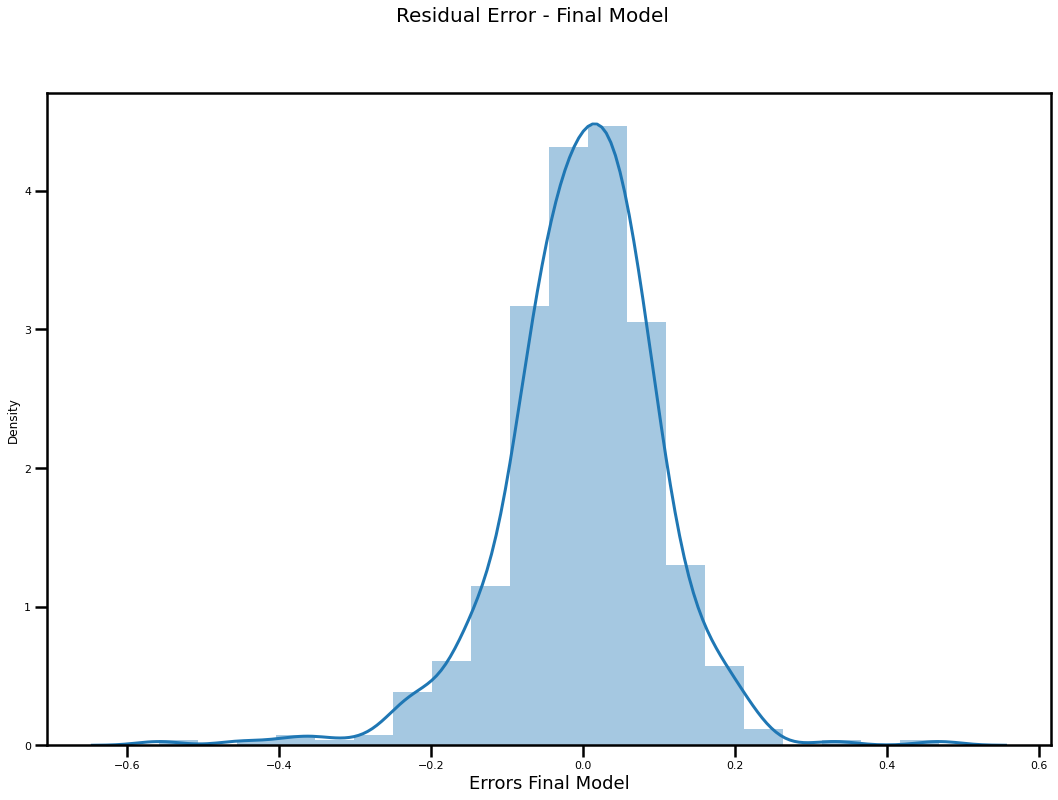

In [138]:
# Plot the histogram of the residual errors for final model lm21
fig = plt.figure(figsize = (18,12))
sns.distplot(residual, bins = 20)
fig.suptitle('Residual Error - Final Model', fontsize = 20)                  
plt.xlabel('Errors Final Model', fontsize = 18)

- The above residual plot passes the assumption of Normality

In [139]:
# For scaling the test data,  we have used transform function as we are not fitting any data 

numerical_vars=['atemp','hum','windspeed','cnt']
df_bike_test[numerical_vars] = scaler.transform(df_bike_test[numerical_vars])

In [140]:
df_bike_test.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,3,4,5,6,7,8,9,10,11,12
184,0,1,0,0.769660,0.657364,0.084219,0.692706,0,0,0,...,0,0,0,0,1,0,0,0,0,0
535,1,0,1,0.842587,0.610133,0.153728,0.712034,0,1,0,...,0,0,0,1,0,0,0,0,0,0
299,0,0,1,0.496145,0.837699,0.334206,0.303382,0,0,1,...,0,0,0,0,0,0,0,1,0,0
221,0,0,1,0.795343,0.437098,0.339570,0.547400,0,0,0,...,0,0,0,0,0,1,0,0,0,0
152,0,0,1,0.741471,0.314298,0.537414,0.569029,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [141]:
# Preparing model for predictions on test data
#  Test data set creatuib for x and y sets

y_test = df_bike_test.pop('cnt')
X_test = df_bike_test

In [142]:
# column identification for test data set from training data by dropping constants
X_train_N=X_train_rfe21_c.drop(['const'], axis=1)

In [143]:
# Creating X test data set by retaining the columns of the regression training model

X_test_N = X_test[X_train_N.columns]

In [144]:
# Adding a constant variable in test data set
X_test_N = sm.add_constant(X_test_N)

In [145]:
X_test_N.columns

Index([                             'const',
                                       'yr',
                                   'spring',
       'Light rain_Light snow_Thunderstorm',
                              'Mist_cloudy',
                                          3,
                                          5,
                                          6,
                                          8,
                                          9,
                                         10,
                                          7,
                                   'Sunday',
                                  'holiday'],
      dtype='object')

In [146]:
#Now let our Regression model make predictions on test data

y_pred = lm21.predict(X_test_N)

Text(0, 0.5, 'y_pred')

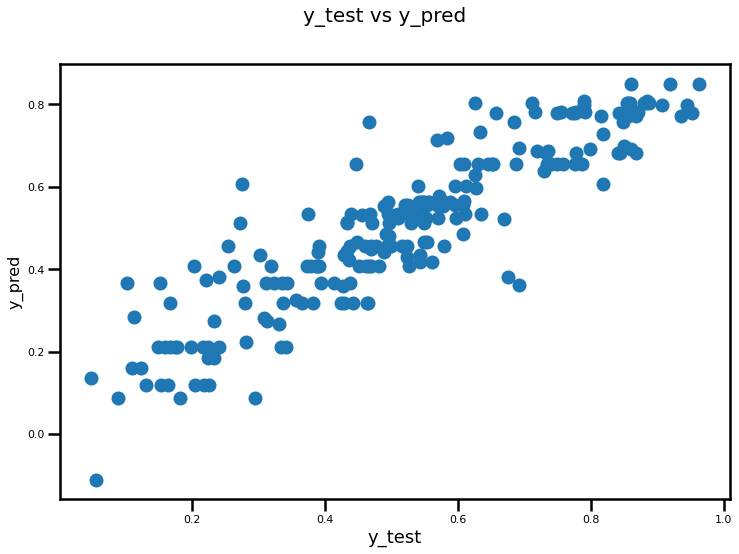

In [147]:
#Visualizing the prediction vs actual test data by scattet plot
fig = plt.figure(figsize = (12,8))
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

Following inferences can be drawn from above graph
- The developed regression model works well to predict the bike demand (cnt)
- There is a significant overlap between predictes and actual demant ( cnt)
This clearly indivates that the developed Regression model is capable of predicting the change is demand very accurately 

### Model Evaluation

In [148]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [149]:
# R2 score of Regression model on test  data

r_squared = r2_score(y_test, y_pred)
r_squared

0.8053972981470607

In [150]:
# R2 score of Regression model on training data
r_squared = r2_score(y_train , y_train_count)
r_squared

0.7969051607688455

So the R2 score for regression model on both test and training data set is 0.8 which are very close and  pretty well score to show the accuracy of the developed model

In [151]:
#  RSME calculation on test data
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('Model RMSE: Test',rmse)

Model RMSE: Test 0.09613954749599146


In [152]:
#  RSME calculation on training data
rmse = np.sqrt(mean_squared_error(y_train , y_train_count))
print('Model RMSE: Train',rmse)

Model RMSE: Train 0.10111571533813576


In [153]:
#Adjusted R^2
#adj r2=1-(1-R2)*(n-1)/(n-p-1)

#n =sample size , p = number of independent variables
Adj_r2_test=1-(1-0.8053972981470607)*(14-1)/(14-1-1)
print(Adj_r2_test)
Adj_r2_train=1-(1-0.7969051607688455)*(14-1)/(14-1-1)
print(Adj_r2_train)

0.7891804063259825
0.779980590832916


- Train - R^2 : 0.7969
- Train - Adjusted R^2 : 0.7799
- Test - R^2: 0.8054
- Test - Adjusted R^2: 0.7891
- Difference in R^2 between train and test: 1.07%
- Difference in adjusted R^2 between Train and test: 1.15%
    
Since adusted R^2 is less than which is less than 5% difference in lr21, we can conclude that it is the best model

In [154]:
X_train_N.head()

,yr,spring,Light rain_Light snow_Thunderstorm,Mist_cloudy,3,5,6,8,9,10,7,Sunday,holiday
653,1,0,0,0,0,0,0,0,0,1,0,0,0
576,1,0,0,0,0,0,0,0,0,0,1,0,0
426,1,1,0,1,1,0,0,0,0,0,0,0,0
728,1,1,0,0,0,0,0,0,0,0,0,1,0
482,1,0,0,1,0,0,0,0,0,0,0,0,0


In [155]:
print(X_train_rfe21_c.columns)
print(lm21.summary())

Index([                             'const',
                                       'yr',
                                   'spring',
       'Light rain_Light snow_Thunderstorm',
                              'Mist_cloudy',
                                          3,
                                          5,
                                          6,
                                          8,
                                          9,
                                         10,
                                          7,
                                   'Sunday',
                                  'holiday'],
      dtype='object')
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     149.7
Date:                Tue, 10 Ja

Text(0, 0.5, 'y_pred')

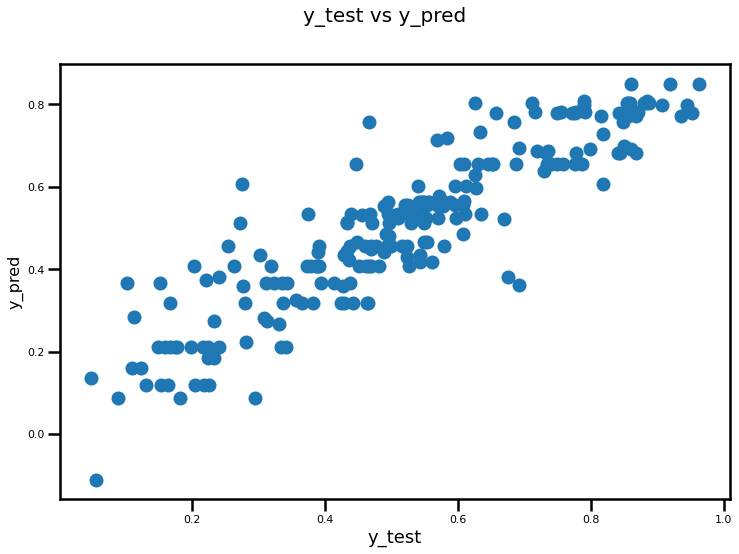

In [156]:
#Visualizing the prediction vs actual test data by scattet plot
fig = plt.figure(figsize = (12,8))
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [157]:
# final check for VIF's 
vif = pd.DataFrame()
X = X_train_rfe1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.68
1,spring,1.45
3,Mist_cloudy,1.41
4,3,1.23
9,10,1.17
7,8,1.14
11,Sunday,1.14
8,9,1.13
5,5,1.12
10,7,1.09


Text(0.5, 0, 'Errors Final Model')

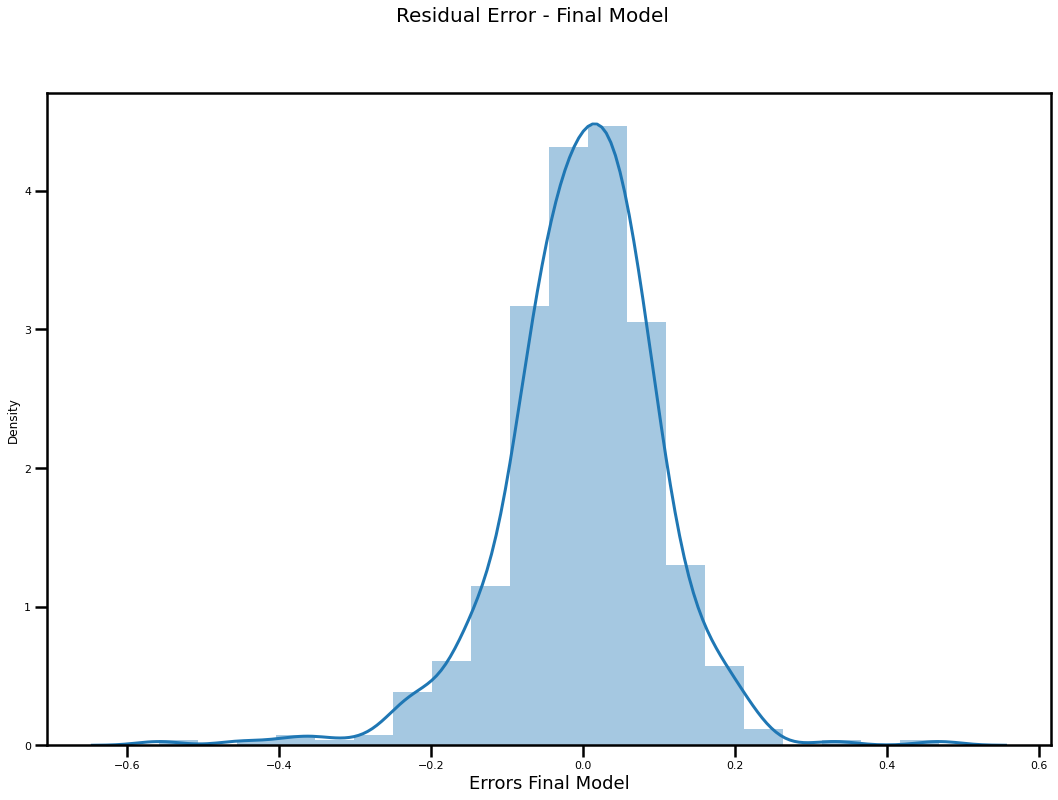

In [158]:
# final check for the normalisty of residuals for final model lm21
fig = plt.figure(figsize = (18,12))
sns.distplot(residual, bins = 20)
fig.suptitle('Residual Error - Final Model', fontsize = 20)                  
plt.xlabel('Errors Final Model', fontsize = 18)

#### The Final Model

cnt= 0.4085 + 0.2469 X yr  -  0.1980 X Spring - 0.3212 X Light rain_Light snow_Thunderstorm - 0.0907 X Mist_Cloudy +0.0635 X 3 + 0.1230  X 5 + 0.1483 X 6 +0.1538 X 8 + 0.1937 X 9  + 0.1168 X 10  + 0.1264 X 7-0.0498 X Sunday - 0.0836X holiday


#### Model Validation
- Train - R^2 : 0.7969
- Train - Adjusted R^2 : 0.7799
- Test - R^2: 0.8054
- Test - Adjusted R^2: 0.7891
- Difference in R^2 between train and test: 1.07%
- Difference in adjusted R^2 between Train and test: 1.15%
    
Since adusted R^2 is less than which is less than 5% difference in lr21, we can conclude that it is the best model

### Analysis on the problem:

- The coefficient value signifies how much of the dependent variable changes given a one-unit shift in the independent variable while holding other variables in the model constant.

- The month variables 3, 5, 6, 8 ,9, 7 , 10 have positive coefficients. It meams that the demands increases in these months.

- The Yr has also positive coefficient. It means that demand in year 2019 is more than that of 2018.

- We also see there are some variables with negative coefficients. A negative coefficient suggests that as the independent variable increases, the dependent variable tends to decrease.

- We have spring, mist cloudy , light snow variables with negative coefficient.

- Days of the week such as Sunday and Holidays have negative coeffiecients and has low demand

#### Analyst's Final Recommendations on the Entire Analysis

Selecting out of various Regression Models

- We will go with the model lr21 from the all the developed  model as it has better accuracy and the feature set in the final model. The sellected feature sets are also inline from the domain point of view. 
- This feature set is inline with expert opinions about the significant fearures that actually impact the Bike Demand. 

The features affecting Bike Demand are the following in the decreasing order of importance

- Year varaiable ( 2018 and 2019) deamd changes
- The month variables 3, 5, 6, 8 ,9, 7 , 10 (number signifies corresponding month of year)
- Harsh Weather Conditions which affects the demand negatively are spring, mist cloudy , light snow  
- Holidays affects the demand negatively
- On Sunday Bike denand has negative impact

- The quantitative magnitude of the significance of each of these variables is given by the following model equation

The final model

cnt= 0.4085 + 0.2469 X yr - 0.1980 X Spring - 0.3212 X Light rain_Light snow_Thunderstorm - 0.0907 X Mist_Cloudy +0.0635 X 3 + 0.1230 X 5 + 0.1483 X 6 +0.1538 X 8 + 0.1937 X 9 + 0.1168 X 10 + 0.1264 X 7-0.0498 X Sunday - 0.0836X holiday

#### Recommendations for the company

- Working days as they have good influence on bike rentals. So it would be great to provide offers to the working individuals
- Demand is higher in month of 3, 5 , 6, 8, 9 ,7 and 10. So premium pricing may be good strategy in these peak demand months
- The year 2019 had more demand than year 2018 so a detailed EDA should be performed to explore the influencing factors for these changes.


#### End of Analysis